[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]
(300, 5)


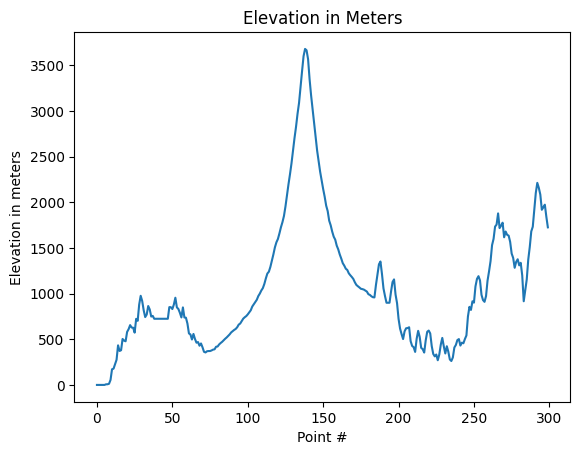

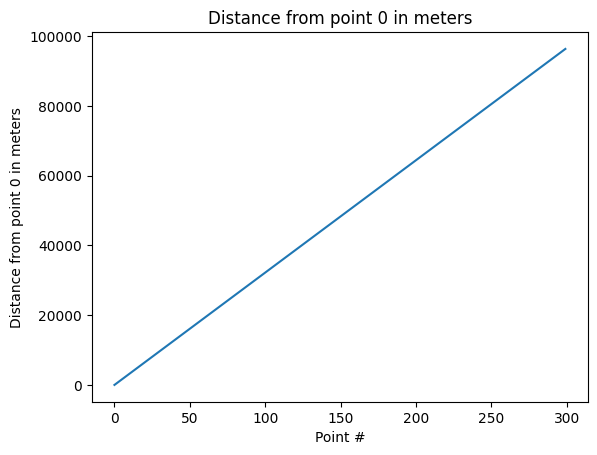

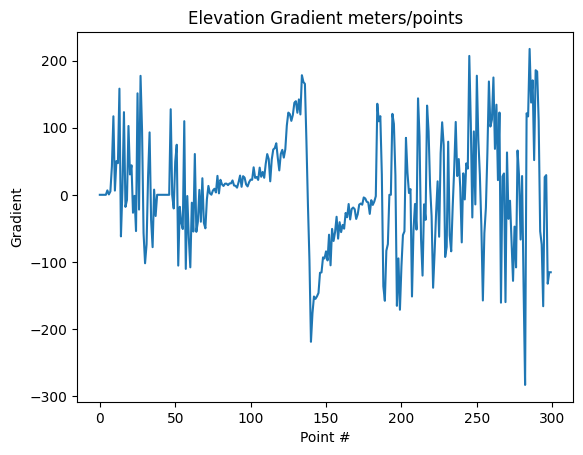

73


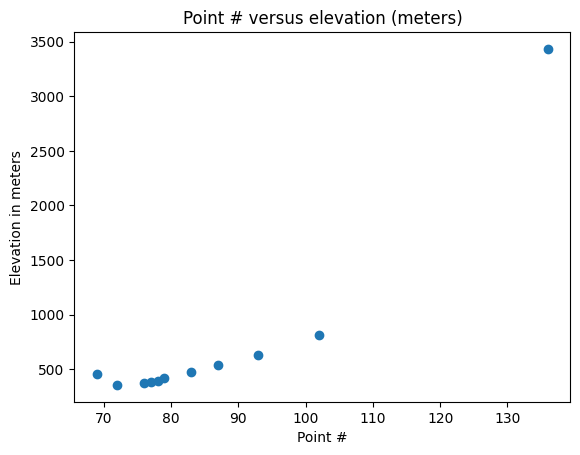

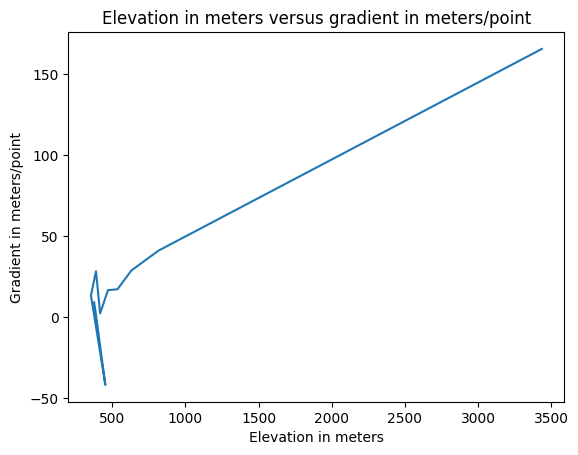

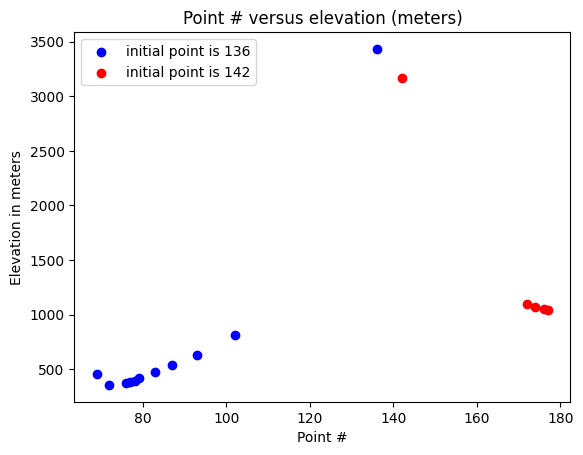

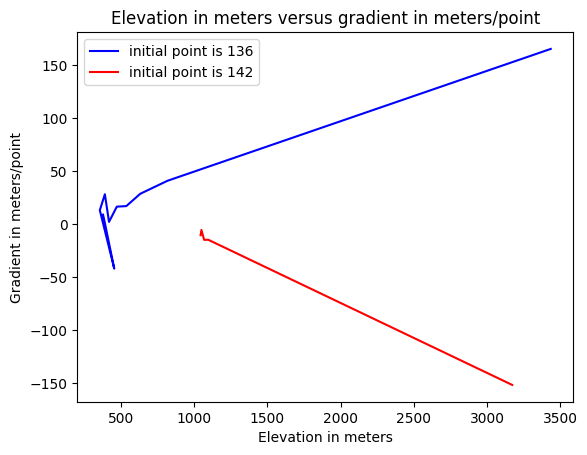

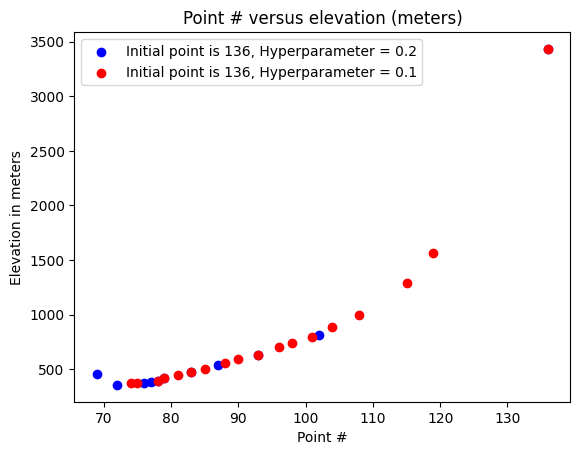

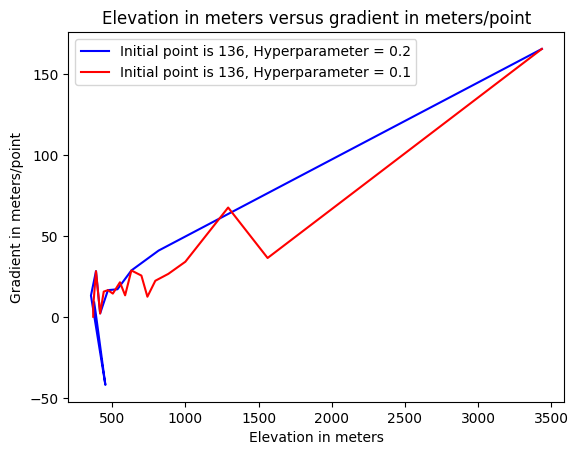

In [13]:
#  [Problem 1] Data visualization 
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji[130:140])
print(np.shape(fuji))
# Format of the data: Point#, latitude, longitude, elevation in meters, and distance from point 0 in meters
import matplotlib.pyplot as plt
plt.figure("""figure 1""")
plt.title("Elevation in Meters")
plt.xlabel("Point #")
plt.ylabel("Elevation in meters")
plt.plot(fuji[:,0], fuji[:,3])
plt.show()
plt.figure("""figure 2""")
plt.title("Distance from point 0 in meters")
plt.xlabel("Point #")
plt.ylabel("Distance from point 0 in meters")
plt.plot(fuji[:,0], fuji[:,4])
plt.show()

# [Problem 2] Create a function to calculate the gradient at a certain point
def compute_gradient(Y, x_array):
    """
    Calculate the gradient using the amount of change.

    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    XT = np.transpose(x_array)
    YT = np.transpose(Y)
    array_xy = np.stack((XT, YT), axis=1)
    [N, M] = np.shape(array_xy)
    gradient = np.zeros((N,1))
    for i in range(1,(N-1),1):
        gradient[i] = (YT[i+1]-YT[i])/(XT[i+1]-XT[i])

    gradient[0] = (YT[1]-YT[0])/(XT[1]-XT[0])
    gradient[N-1] =  (YT[N-1]-YT[N-2])/(XT[N-1]-XT[N-2])
    
    
    return array_xy, gradient

array_xy, gradient = compute_gradient(fuji[:,3],fuji[:,0])
plt.figure("""figure 3""")
plt.title("Elevation Gradient meters/points")
plt.xlabel("Point #")
plt.ylabel("Gradient")
plt.plot(array_xy[:,0],gradient)
plt.show()


# [Problem 3] Create a function to calculate the destination point
# destination point = current point- 0.2 x current point gradient
def destination_point(N, gradient, hyperparameter):
    next_point = N - hyperparameter*gradient[N]
    return next_point

N = 75
hyperp = 0.2
next_point = destination_point(N, gradient, hyperp)
print(int(next_point))

# [Problem 4] Create a function to go down the mountain
N = 136
hyperp = 0.2
elev1 = fuji[N,3]

# Recording arrays for visulization of the descent proces in Problem 5.
destination_point_array = []
elevation_array = []
gradient_array = []

# Recording of the first point.
destination_point_array.append(N)
elevation_array.append(elev1)
gradient_array.append(gradient[N])


while True:
     next_point = destination_point(N, gradient, hyperp)
     N = int(next_point)
     elev2 = fuji[N,3]
     # Recording of the computed points
     destination_point_array.append(N)
     elevation_array.append(elev2)
     gradient_array.append(gradient[N])
     if abs(elev1-elev2) <= 10:
        break
     elev1 = elev2

# [Problem 5] Visualization of the descent process
# Plot of Point versus elevation as dots
plt.figure("""figure 4""")
plt.title("Point # versus elevation (meters)")
plt.xlabel("Point #")
plt.ylabel("Elevation in meters")
plt.scatter(destination_point_array,elevation_array,marker="o")
plt.show()

# Plot of elevation versus gradient as line plot
plt.figure("""figure 5""")
plt.title("Elevation in meters versus gradient in meters/point")
plt.xlabel("Elevation in meters")
plt.ylabel("Gradient in meters/point")
plt.plot(elevation_array, gradient_array)
plt.show()

# [Problem 6] Change of initial value
N = 142
hyperp = 0.2
elev1 = fuji[N,3]

# Recording arrays for visulization of the descent proces in Problem 5.
destination_point_array_initial = []
elevation_array_initial = []
gradient_array_initial = []

# Recording of the first point.
destination_point_array_initial.append(N)
elevation_array_initial.append(elev1)
gradient_array_initial.append(gradient[N])


while True:
     next_point = destination_point(N, gradient, hyperp)
     N = int(next_point)
     elev2 = fuji[N,3]
     # Recording of the computed points
     destination_point_array_initial.append(N)
     elevation_array_initial.append(elev2)
     gradient_array_initial.append(gradient[N])
     if abs(elev1-elev2) <= 10:
        break
     elev1 = elev2

# [Problem 7] Visualization of the descent process for each initial value
# Plot of Point versus elevation as dots
plt.figure("""figure 6""")
plt.title("Point # versus elevation (meters)")
plt.xlabel("Point #")
plt.ylabel("Elevation in meters")
plt.scatter(destination_point_array,elevation_array, marker="o", color='blue', label='initial point is 136')
plt.scatter(destination_point_array_initial,elevation_array_initial, marker="o", color='red', label='initial point is 142')
plt.legend()
plt.show()

# Plot of elevation versus gradient as line plot
plt.figure("""figure 7""")
plt.title("Elevation in meters versus gradient in meters/point")
plt.xlabel("Elevation in meters")
plt.ylabel("Gradient in meters/point")
plt.plot(elevation_array, gradient_array, color='blue', label='initial point is 136')
plt.plot(elevation_array_initial, gradient_array_initial, color='red', label='initial point is 142')
plt.legend()
plt.show()

# [Problem 8] (Advance problem) Hyperparameter changes
N = 136
hyperp = 0.1
elev1 = fuji[N,3]

# Recording arrays for visulization of the descent proces in Problem 5.
destination_point_array_hyper = []
elevation_array_hyper = []
gradient_array_hyper = []

# Recording of the first point.
destination_point_array_hyper.append(N)
elevation_array_hyper.append(elev1)
gradient_array_hyper.append(gradient[N])


while True:
     next_point = destination_point(N, gradient, hyperp)
     N = int(next_point)
     elev2 = fuji[N,3]
     # Recording of the computed points
     destination_point_array_hyper.append(N)
     elevation_array_hyper.append(elev2)
     gradient_array_hyper.append(gradient[N])
     if abs(elev1-elev2) <= 10:
        break
     elev1 = elev2
    
# Plot of Point versus elevation as dots
plt.figure("""figure 8""")
plt.title("Point # versus elevation (meters)")
plt.xlabel("Point #")
plt.ylabel("Elevation in meters")
plt.scatter(destination_point_array,elevation_array, marker="o", color='blue', label='Initial point is 136, Hyperparameter = 0.2')
plt.scatter(destination_point_array_hyper,elevation_array_hyper, marker="o", color='red', label='Initial point is 136, Hyperparameter = 0.1')
plt.legend()
plt.show()

# Plot of elevation versus gradient as line plot
plt.figure("""figure 9""")
plt.title("Elevation in meters versus gradient in meters/point")
plt.xlabel("Elevation in meters")
plt.ylabel("Gradient in meters/point")
plt.plot(elevation_array, gradient_array, color='blue', label='Initial point is 136, Hyperparameter = 0.2')
plt.plot(elevation_array_hyper, gradient_array_hyper, color='red', label='Initial point is 136, Hyperparameter = 0.1')
plt.legend()
plt.show()